**Librairie Nécessaire**

In [144]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

**Importer le CSV**

In [145]:
df= pd.read_csv('cardio_train.csv')

**Visalisation des données**

In [146]:
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [147]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.to_csv("cardio_train_clean.csv", sep=",", index=False)

In [148]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Nettoyer les données**

Aperçu des données:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Informations sur le dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  

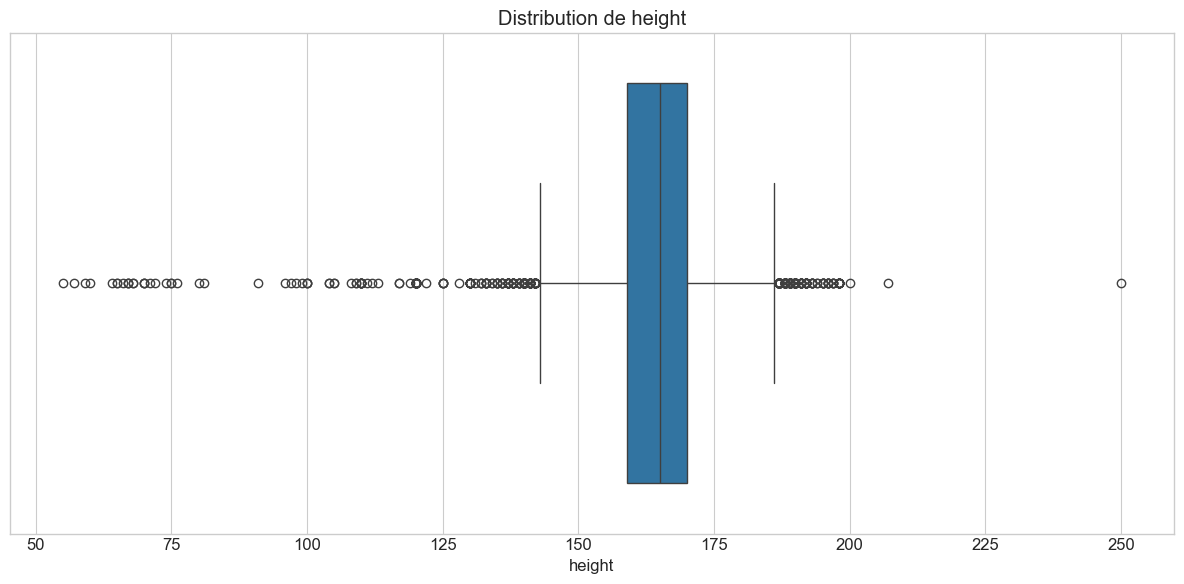

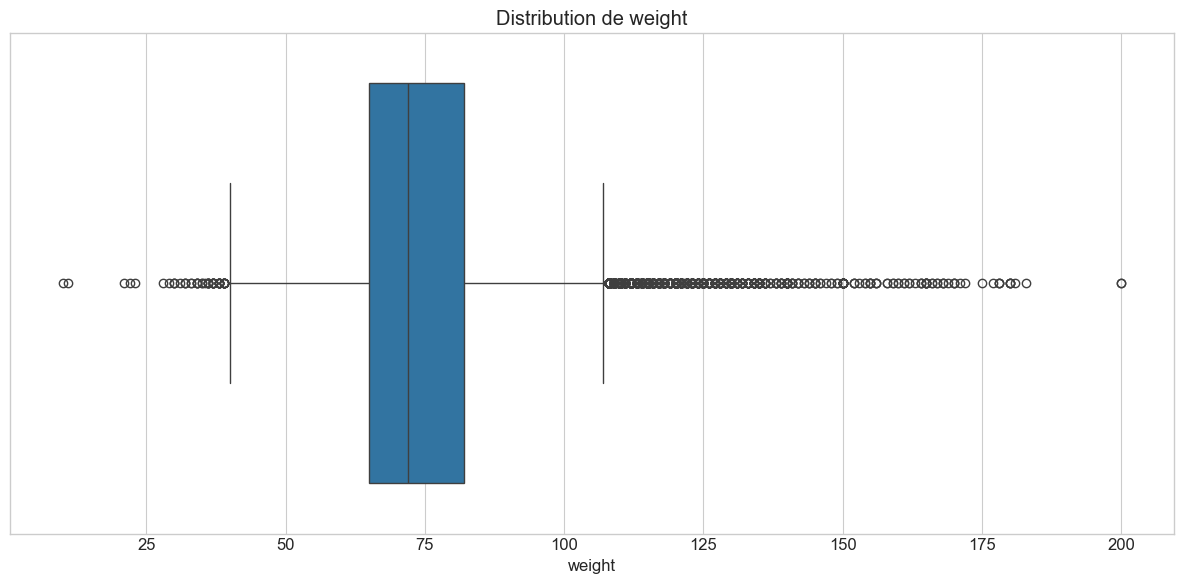

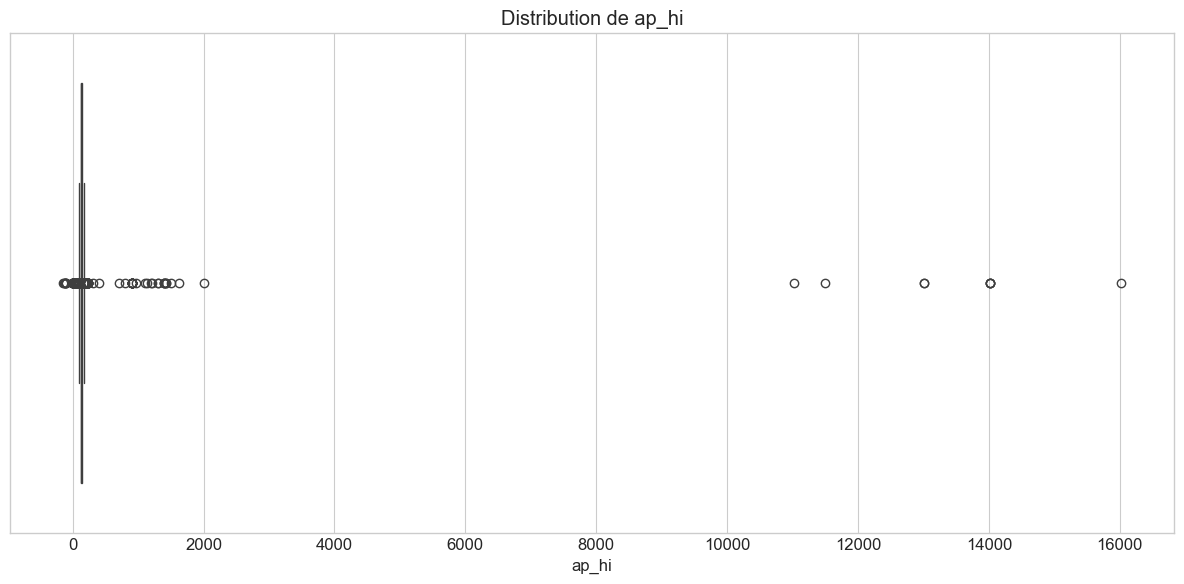

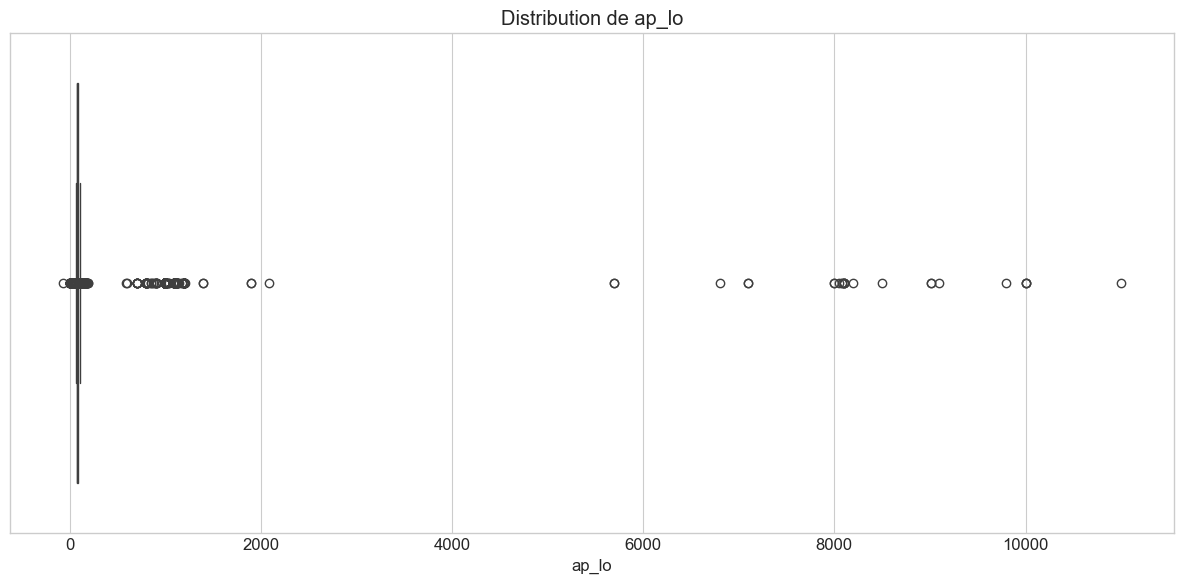

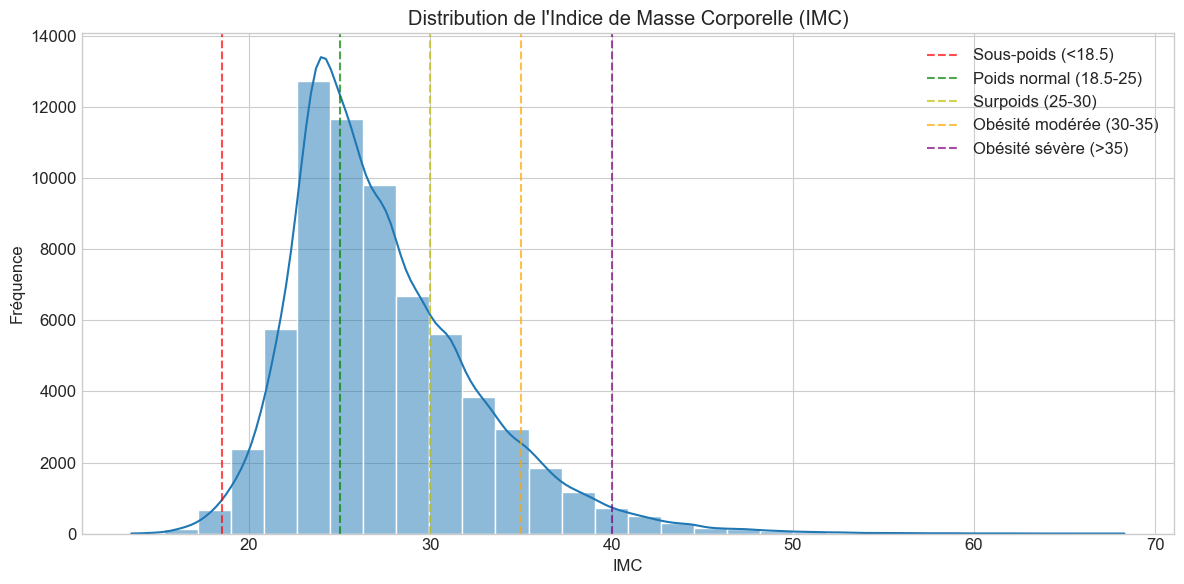

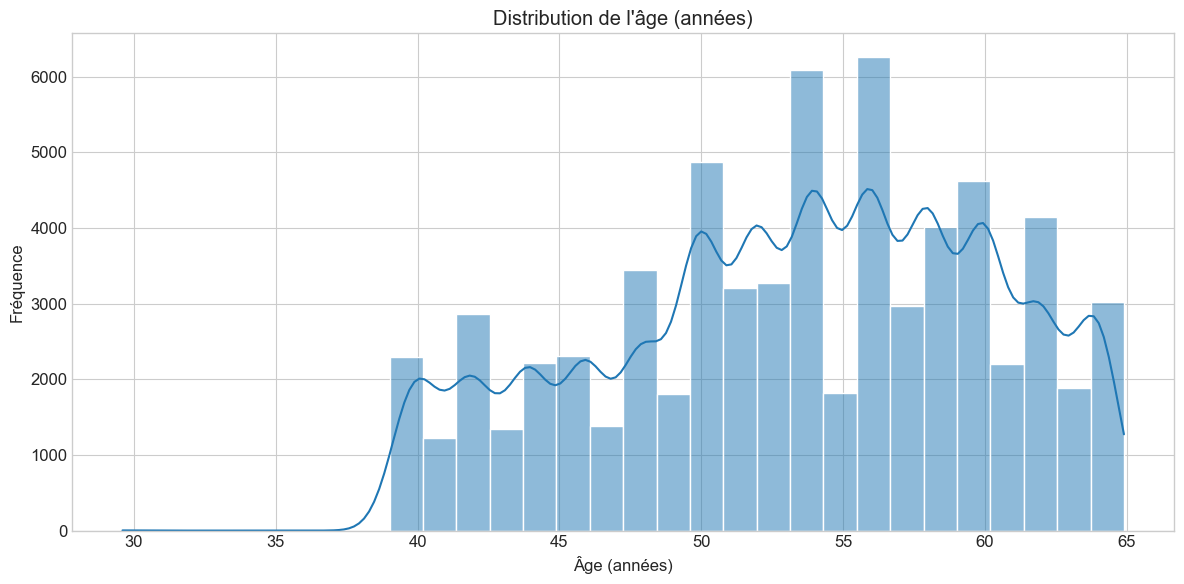

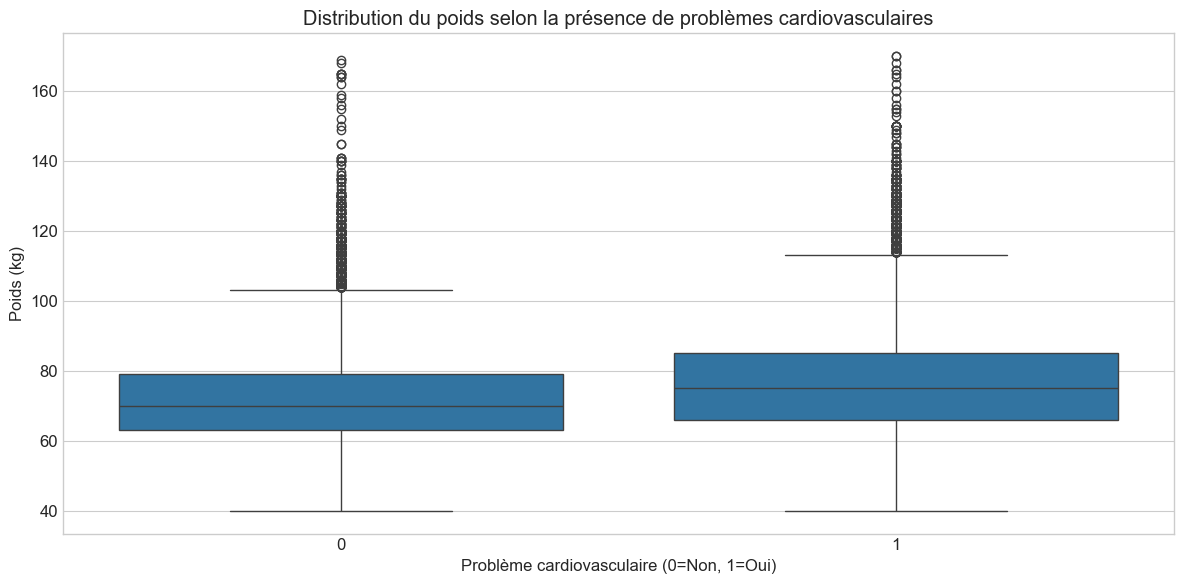

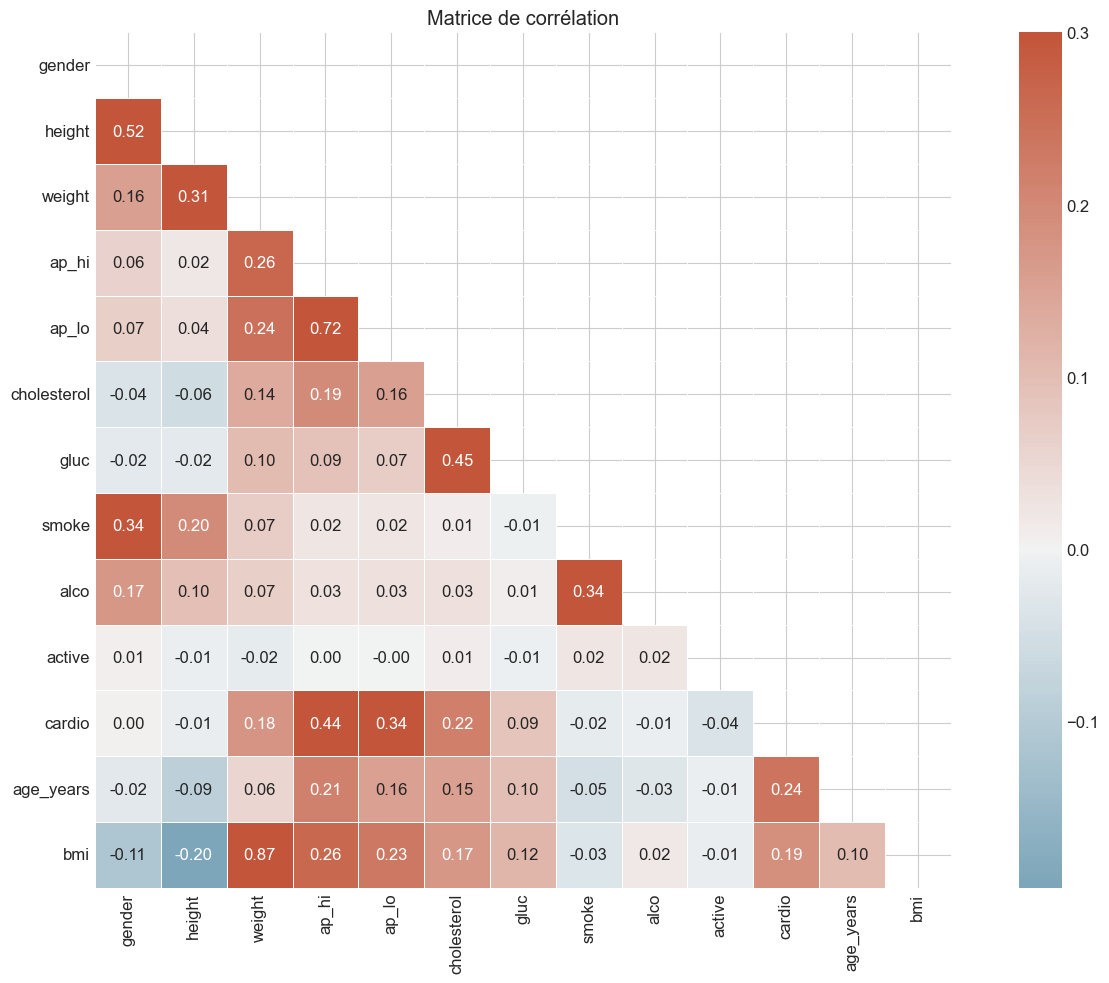

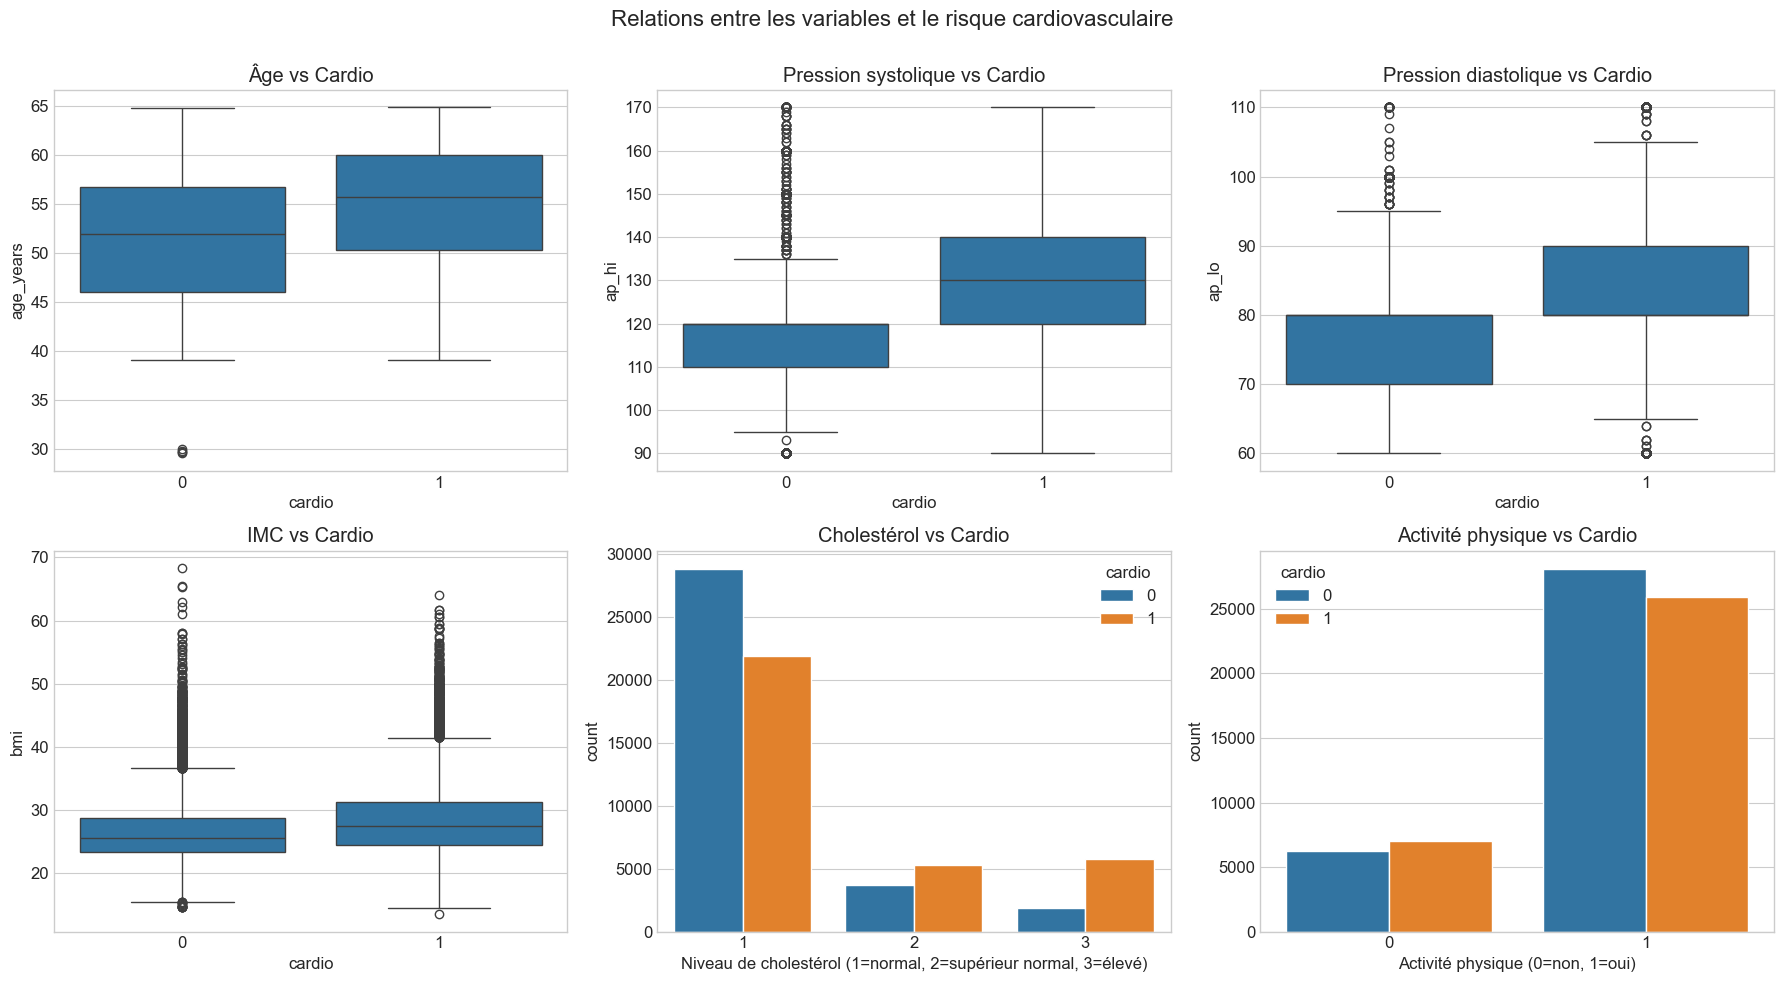

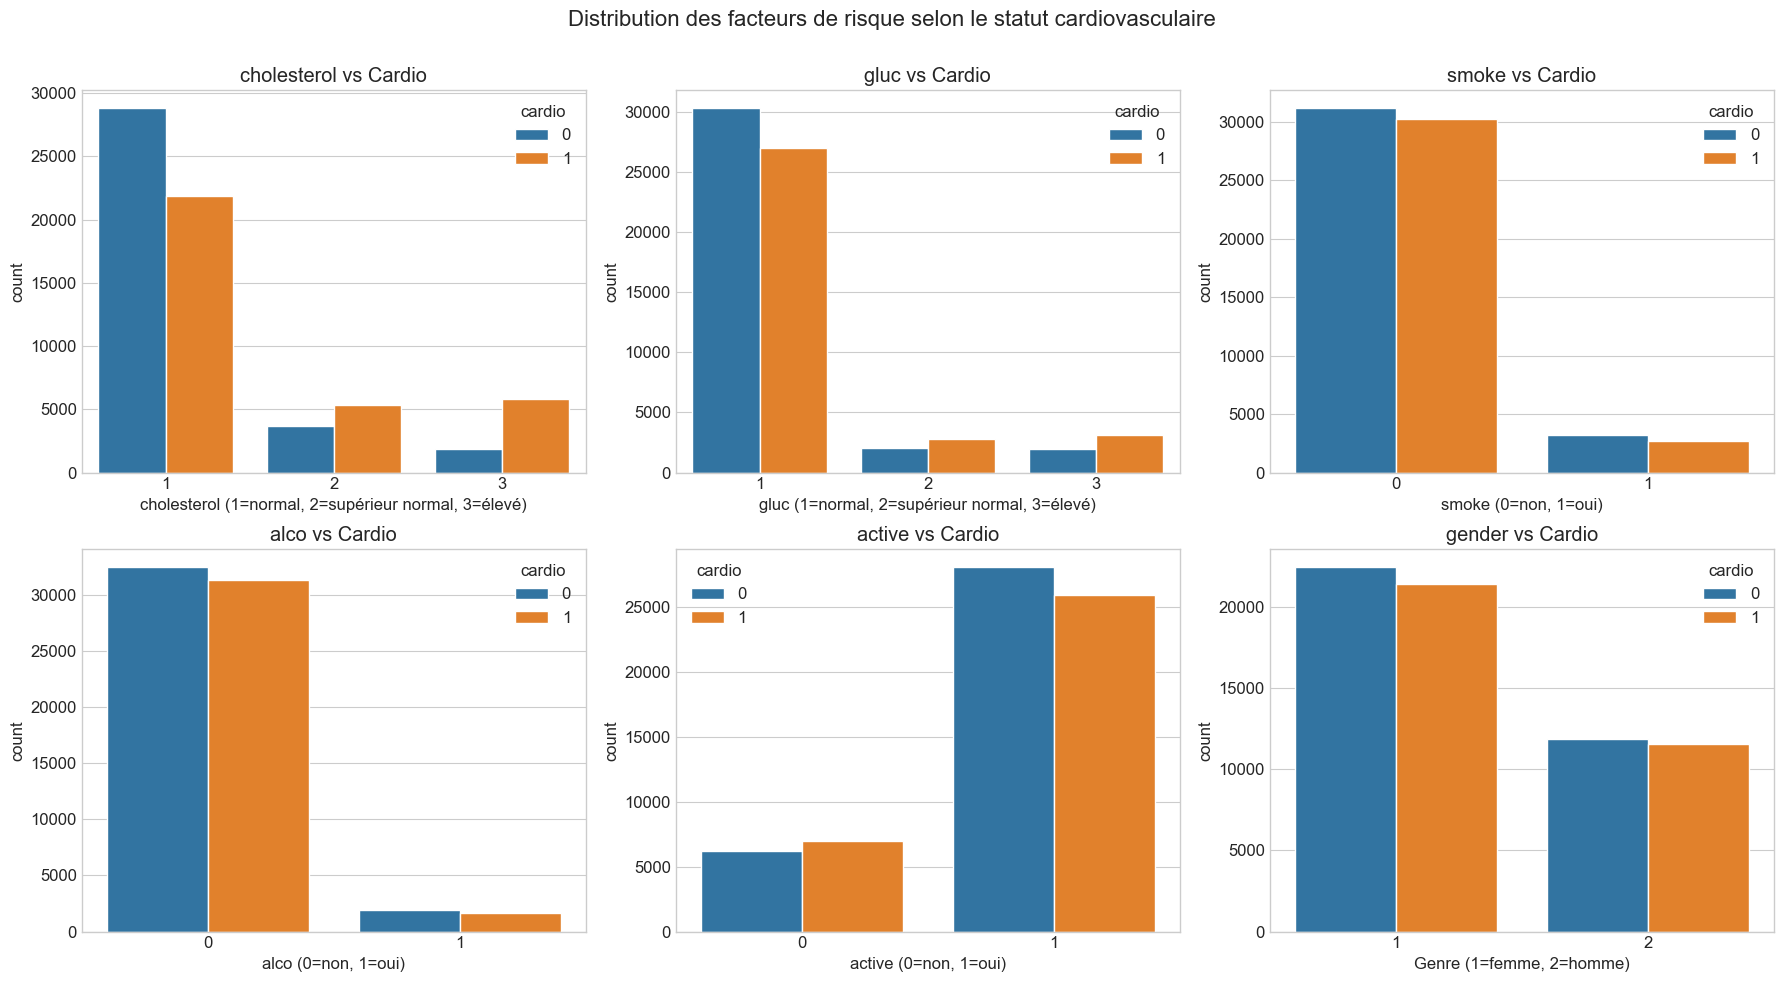

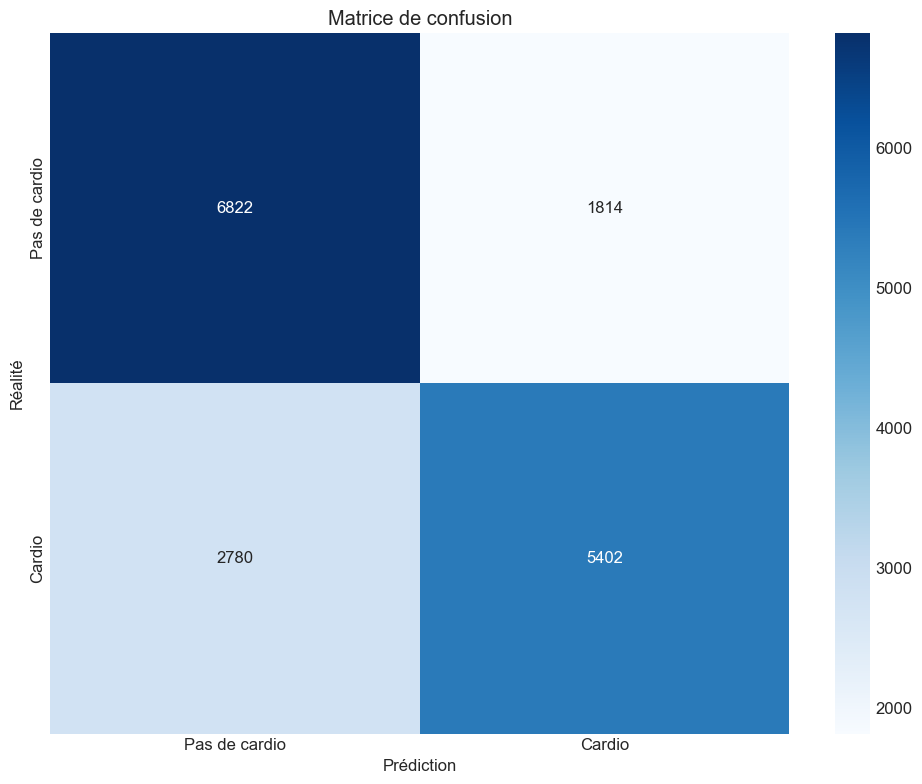

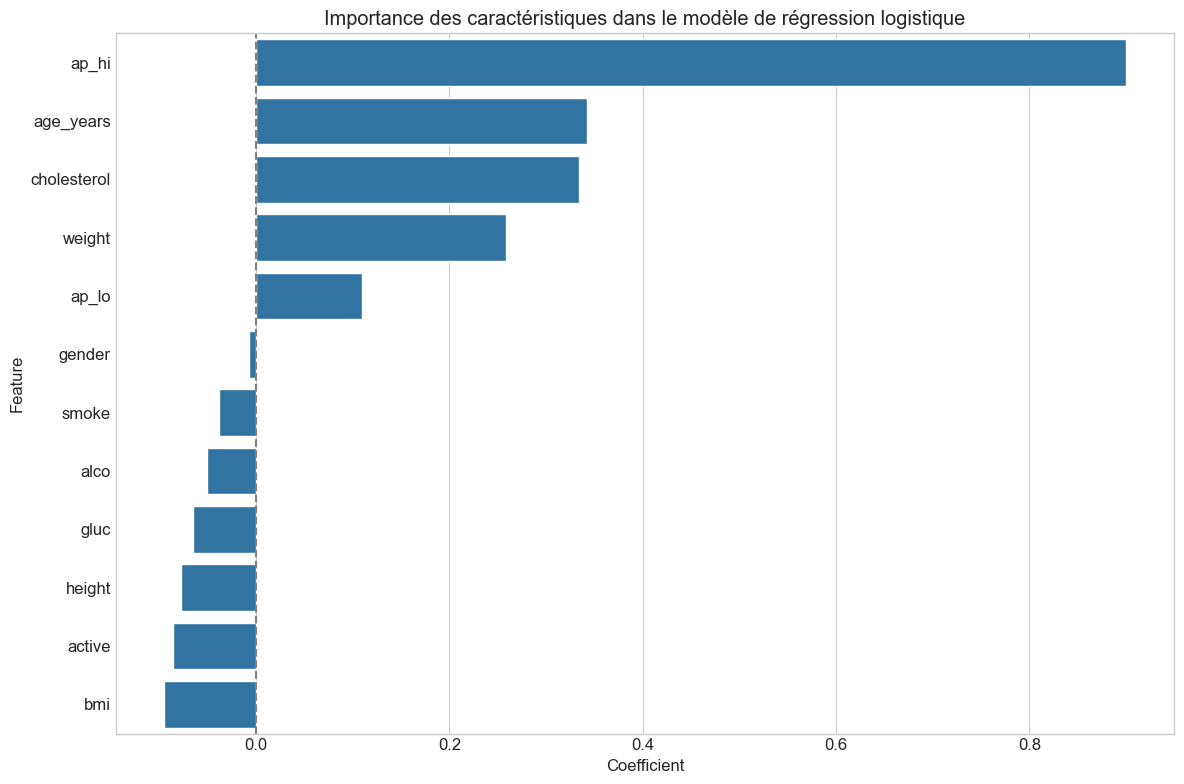

In [156]:
#!/usr/bin/env python
# coding: utf-8

# # Analyse de données médicales cardiovasculaires
# 
# Ce notebook réalise le pré-traitement, l'analyse exploratoire et la modélisation prédictive 
# de données médicales cardiovasculaires.

# ## 1. Chargement et inspection des données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

# Chargement des données
df = pd.read_csv('cardio_train_clean.csv')

# Affichage des premières lignes
print("Aperçu des données:")
print(df.head())

# Informations sur le dataframe
print("\nInformations sur le dataframe:")
print(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())

# ## 2. Pré-traitement des données

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())

# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"\nNombre de lignes dupliquées: {duplicates}")

# Conversion de l'âge de jours en années
df['age_years'] = (df['age'] / 365.25).round(1)

# Analyse des distributions et identification des valeurs aberrantes
def plot_boxplot_with_outliers(df, column, lower_bound=None, upper_bound=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution de {column}')
    plt.tight_layout()
    
    # Calcul des valeurs aberrantes
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR if lower_bound is None else lower_bound
    upper = Q3 + 1.5 * IQR if upper_bound is None else upper_bound
    
    outliers = df[(df[column] < lower) | (df[column] > upper)][column].count()
    
    print(f"Statistiques pour {column}:")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Limite inférieure: {lower}, Limite supérieure: {upper}")
    print(f"Nombre de valeurs aberrantes: {outliers} ({outliers/len(df)*100:.2f}%)")
    
    return lower, upper

# Analyse et filtrage des variables médicales
print("\nAnalyse des valeurs aberrantes:")

# Taille (cm)
lower_height, upper_height = plot_boxplot_with_outliers(df, 'height', 140, 200)

# Poids (kg)
lower_weight, upper_weight = plot_boxplot_with_outliers(df, 'weight', 40, 170)

# Pression artérielle systolique (mm Hg)
lower_ap_hi, upper_ap_hi = plot_boxplot_with_outliers(df, 'ap_hi', 90, 170)

# Pression artérielle diastolique (mm Hg)
lower_ap_lo, upper_ap_lo = plot_boxplot_with_outliers(df, 'ap_lo', 60, 110)

# Filtrage des données selon les limites physiologiquement acceptables
df_clean = df.copy()
df_clean = df_clean[
    (df_clean['height'] >= lower_height) & (df_clean['height'] <= upper_height) &
    (df_clean['weight'] >= lower_weight) & (df_clean['weight'] <= upper_weight) &
    (df_clean['ap_hi'] >= lower_ap_hi) & (df_clean['ap_hi'] <= upper_ap_hi) &
    (df_clean['ap_lo'] >= lower_ap_lo) & (df_clean['ap_lo'] <= upper_ap_lo)
]

print(f"\nTaille du jeu de données original: {len(df)}")
print(f"Taille du jeu de données nettoyé: {len(df_clean)}")
print(f"Lignes supprimées: {len(df) - len(df_clean)} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")

# Ajout d'une variable IMC (Indice de Masse Corporelle)
df_clean['bmi'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)
df_clean['bmi'] = df_clean['bmi'].round(1)

# Affichage de la distribution de l'IMC
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['bmi'], bins=30, kde=True)
plt.axvline(18.5, color='r', linestyle='--', alpha=0.7, label='Sous-poids (<18.5)')
plt.axvline(25, color='g', linestyle='--', alpha=0.7, label='Poids normal (18.5-25)')
plt.axvline(30, color='y', linestyle='--', alpha=0.7, label='Surpoids (25-30)')
plt.axvline(35, color='orange', linestyle='--', alpha=0.7, label='Obésité modérée (30-35)')
plt.axvline(40, color='purple', linestyle='--', alpha=0.7, label='Obésité sévère (>35)')
plt.title('Distribution de l\'Indice de Masse Corporelle (IMC)')
plt.xlabel('IMC')
plt.ylabel('Fréquence')
plt.legend()
plt.tight_layout()

# ## 3. Analyse exploratoire des données

# Histogramme de l'âge
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='age_years', bins=30, kde=True)
plt.title('Distribution de l\'âge (années)')
plt.xlabel('Âge (années)')
plt.ylabel('Fréquence')
plt.tight_layout()

# Boxplot du poids selon la variable cardio
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='cardio', y='weight')
plt.title('Distribution du poids selon la présence de problèmes cardiovasculaires')
plt.xlabel('Problème cardiovasculaire (0=Non, 1=Oui)')
plt.ylabel('Poids (kg)')
plt.tight_layout()

# Matrice de corrélation
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean.drop(['id', 'age'], axis=1).corr()
mask = np.triu(correlation_matrix)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')
plt.title('Matrice de corrélation')
plt.tight_layout()

# Relations entre variables importantes et la cible
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relations entre les variables et le risque cardiovasculaire', fontsize=16)

sns.boxplot(data=df_clean, x='cardio', y='age_years', ax=axes[0, 0])
axes[0, 0].set_title('Âge vs Cardio')

sns.boxplot(data=df_clean, x='cardio', y='ap_hi', ax=axes[0, 1])
axes[0, 1].set_title('Pression systolique vs Cardio')

sns.boxplot(data=df_clean, x='cardio', y='ap_lo', ax=axes[0, 2])
axes[0, 2].set_title('Pression diastolique vs Cardio')

sns.boxplot(data=df_clean, x='cardio', y='bmi', ax=axes[1, 0])
axes[1, 0].set_title('IMC vs Cardio')

sns.countplot(data=df_clean, x='cholesterol', hue='cardio', ax=axes[1, 1])
axes[1, 1].set_title('Cholestérol vs Cardio')
axes[1, 1].set_xlabel('Niveau de cholestérol (1=normal, 2=supérieur normal, 3=élevé)')

sns.countplot(data=df_clean, x='active', hue='cardio', ax=axes[1, 2])
axes[1, 2].set_title('Activité physique vs Cardio')
axes[1, 2].set_xlabel('Activité physique (0=non, 1=oui)')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Analyse des facteurs de risque
risk_factors = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, factor in enumerate(risk_factors):
    sns.countplot(data=df_clean, x=factor, hue='cardio', ax=axes[i])
    axes[i].set_title(f'{factor} vs Cardio')
    
    # Ajouter des étiquettes spécifiques selon les variables
    if factor == 'cholesterol' or factor == 'gluc':
        axes[i].set_xlabel(f'{factor} (1=normal, 2=supérieur normal, 3=élevé)')
    elif factor in ['smoke', 'alco', 'active']:
        axes[i].set_xlabel(f'{factor} (0=non, 1=oui)')
    elif factor == 'gender':
        axes[i].set_xlabel('Genre (1=femme, 2=homme)')

plt.tight_layout()
plt.suptitle('Distribution des facteurs de risque selon le statut cardiovasculaire', fontsize=16)
plt.subplots_adjust(top=0.9)

# ## 4. Préparation au modèle de régression logistique

# Sélection des caractéristiques (features)
features = ['age_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
            'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']
X = df_clean[features]
y = df_clean['cardio']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"\nDimensions du jeu d'entraînement: {X_train.shape}")
print(f"Dimensions du jeu de test: {X_test.shape}")

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ## 5. Entraînement du modèle de régression logistique

# Initialisation et entraînement du modèle
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluation du modèle
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pas de cardio', 'Cardio'], 
            yticklabels=['Pas de cardio', 'Cardio'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.tight_layout()

print("\nMatrice de confusion:")
print(conf_matrix)

print("\nRapport de classification:")
print(class_report)

# Analyse des coefficients du modèle
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title('Importance des caractéristiques dans le modèle de régression logistique')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()

# ## 6. Conclusion

print("\nConclusion de l'analyse:")
print("1. Les variables ayant le plus d'impact sur le risque cardiovasculaire sont:", 
      ", ".join(coefficients.head(3)['Feature'].tolist()))
print("2. Le modèle de régression logistique atteint une précision de:", 
      f"{(conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum():.2%}")
print("3. L'âge, la pression artérielle et le niveau de cholestérol semblent être les facteurs de risque les plus importants.")